In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

# Repaso Regresion Lineal


In [3]:
# Data Randomized
# Function --> y = 0.961x³ + 5.6x² + 17.63x + 100
x = np.arange(-5, 1, 0.1)

df = pd.DataFrame(x,columns = ["x"])
df["y"] = 0.961*df["x"]**3 + 5.6*df["x"]**2 + 17.63*df["x"] + 100

ruido = 1*(np.random.randn(60)+ np.random.randint(100))
df["y_real"] = df["y"] + ruido

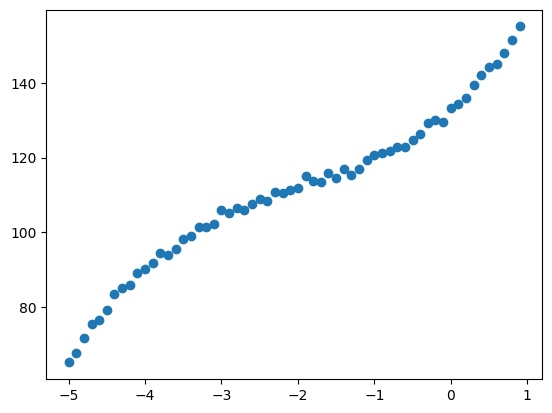

In [4]:
plt.scatter(df["x"],df["y_real"])

In [5]:
# Regresión lineal 
from sklearn.linear_model import LinearRegression

regresion = LinearRegression()

regresion.fit(df["x"].values.reshape(-1,1),df["y_real"])
y_pred = regresion.predict(df["x"].values.reshape(-1,1))

Repaso :
https://www.youtube.com/watch?v=vMh0zPT0tLI


![SNOWFALL](linealRegression.png)

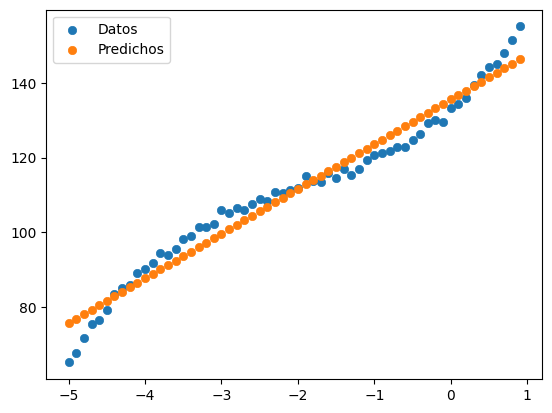

In [6]:
plt.scatter(df["x"],df["y_real"],lw = 0.5,label = "Datos")
plt.scatter(df["x"],y_pred, lw=0.5, label="Regresión lineal")
plt.legend(["Datos","Predichos"])
plt.show();

# Support Vector Machine

Es un modelo de ML capaz de realizar clasificación, regresión de manera lineal y no lineal. Es muy bueno para datasets pequeños o medianos

In [7]:
# Creación de clusters
from sklearn.datasets._samples_generator import make_blobs

x,y = make_blobs(n_samples=100,centers= 2,n_features=2,random_state=0,cluster_std=0.60)

x

array([[ 3.35320909e+00,  1.69958043e+00],
       [ 1.36678633e+00,  6.34971633e-01],
       [ 2.24592863e-01,  4.77028154e+00],
       [ 4.43598630e-01,  3.11530945e+00],
       [ 2.76808540e+00,  1.08782923e+00],
       [ 1.25566754e+00,  3.38204112e+00],
       [ 1.00372519e+00,  4.19147702e+00],
       [ 3.20903274e+00,  1.78597253e+00],
       [ 7.43873988e-01,  4.12240568e+00],
       [ 1.57322172e+00,  4.83933793e-01],
       [ 7.67522789e-01,  4.39759671e+00],
       [ 1.83375842e+00,  7.54036153e-01],
       [ 1.10123507e+00,  4.88977075e+00],
       [ 4.31891060e-01,  4.33495456e+00],
       [ 1.89446550e+00,  1.37913750e+00],
       [ 3.48515439e+00,  1.46435135e+00],
       [ 2.73124907e+00,  2.49704755e-01],
       [ 5.72793810e-01,  4.08805543e+00],
       [ 1.26572308e+00,  6.20712897e-01],
       [ 1.59331788e+00,  1.22121317e+00],
       [ 1.06923853e+00,  4.53068484e+00],
       [ 7.89338559e-01,  4.33748653e+00],
       [ 1.61152972e+00,  1.82347242e+00],
       [ 2.

A continuación se muestra la representación de un conjunto de datos creados de manera aleatoria que representas dos clusters para valores diferentes (Rojo y Negro). Imaginemonos que queremos realizar una clasificación de estos para nuevos valores es por ello que usamos un SVM para dividir el conjunto por medio de un hiperplano(recta que divide el plano en partes ) y realizar su respectiva clasificacion

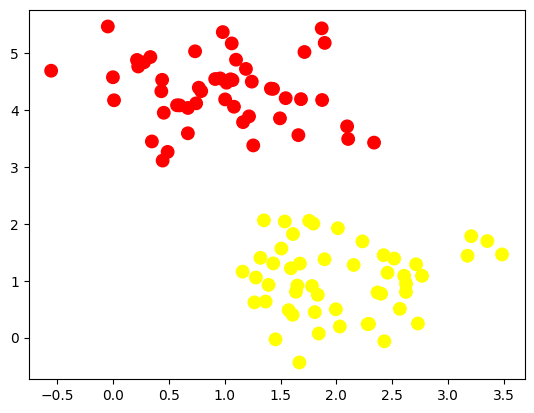

In [8]:
# Vector <x,y>
# Todos los valores de x
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, cmap='autumn');

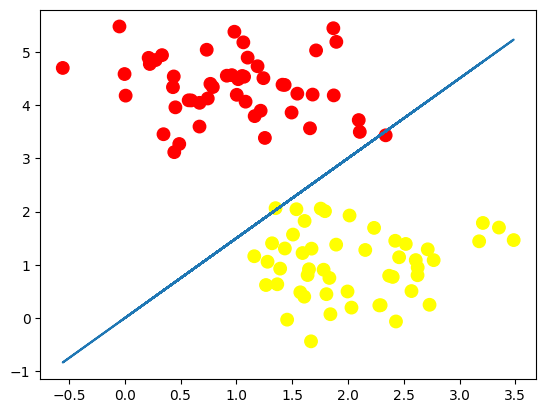

In [9]:
# Ejemplo de un hiperplano
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, cmap='autumn')

# Hiperplano con la ecuación B0 + B1x_1 + B2x_2 = 0

# Ecuacion del hiper plano

plt.plot(x[:,0],1*x[:,0]+0.5*x[:,0])
'''
for i in range(5):
    plt.plot(x[:, 0], x[i,0]*x[:, 0] + x[i+1,0]*x[:, 0])  
'''
plt.show();

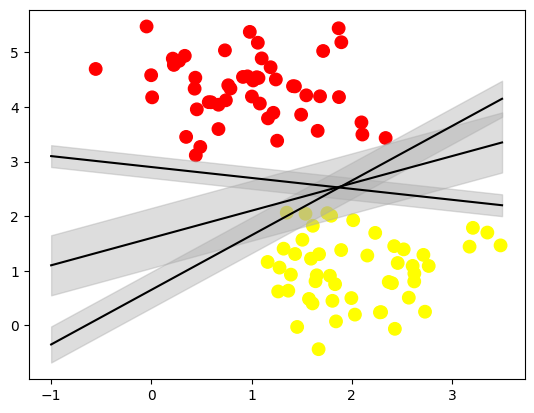

In [10]:
plt.scatter(x[:, 0], x[:, 1], c=y, s=80, cmap='autumn')

# Hiperplano con la ecuación B0 + B1x_1 + B2x_2 = 0

# Ecuacion del hiper plano
xfit = np.linspace(-1, 3.5)

xfit
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b

    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

## Hard Margin Classification

Separar extrictamente los datos puede ser perjudicial en algunos casos pues pueden existir valores atipicos (outliers), es por ello mejor aplicar un soft margin classification la cual se puede controlar por medio del hiperparametro C

El hiperparametro realiza un balance entre la maximización del margen y la violación de la clasificación. En ocasiones debemos hacer varias pruebas para ver que valor de C sirve más en caso de que se este realizando un overfitting


In [11]:
# Ejemplo de SVM

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()

In [12]:
X = iris['data'][:,(2,3)] # petal largo y ancho
y = (iris['target']==2).astype(np.float64)  # Tipo virginica

#svm= SVC(kernel = "linear", C = 1)
svm = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [13]:
svm.predict([[5.5, 1.7]])

array([1.])

In [14]:
df = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    ) 

a = df[df['petal length (cm)'] == 5.5]
a

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
112,6.8,3.0,5.5,2.1,2.0
116,6.5,3.0,5.5,1.8,2.0
137,6.4,3.1,5.5,1.8,2.0


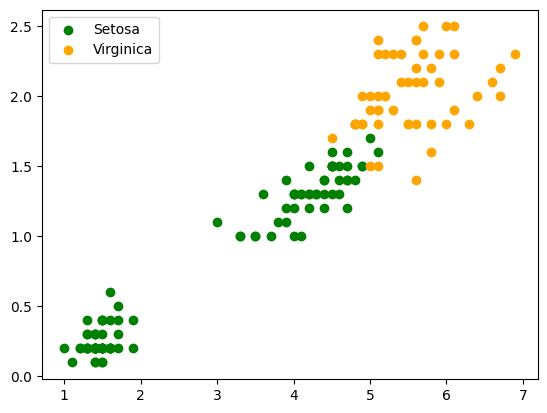

In [15]:
plt.scatter(X[:,0][y==0],X[:,1][y==0], label = "Iris Vr",color = "green")
plt.scatter(X[:,0][y==1],X[:,1][y==1], label = "Iris Vr",color = "orange")

# Punto predicho
#plt.plot([5.5], [1.7], 'x', color='red', markeredgewidth=2, markersize=10)

#plt.xlim(3,7)
#plt.ylim(0.5,3)

plt.legend(["Setosa","Virginica",])

In [16]:
svm.predict([[4,1]])

array([0.])

In [17]:
def classification(iris):
    species = []
    for i in range(len(iris['target'])):
        if iris['target'][i] == 0:
            species.append("setosa")
        elif iris['target'][i] == 1:
            species.append('versicolor')
        else:
            species.append('virginica')
    iris['species'] = species            
    return iris['species']

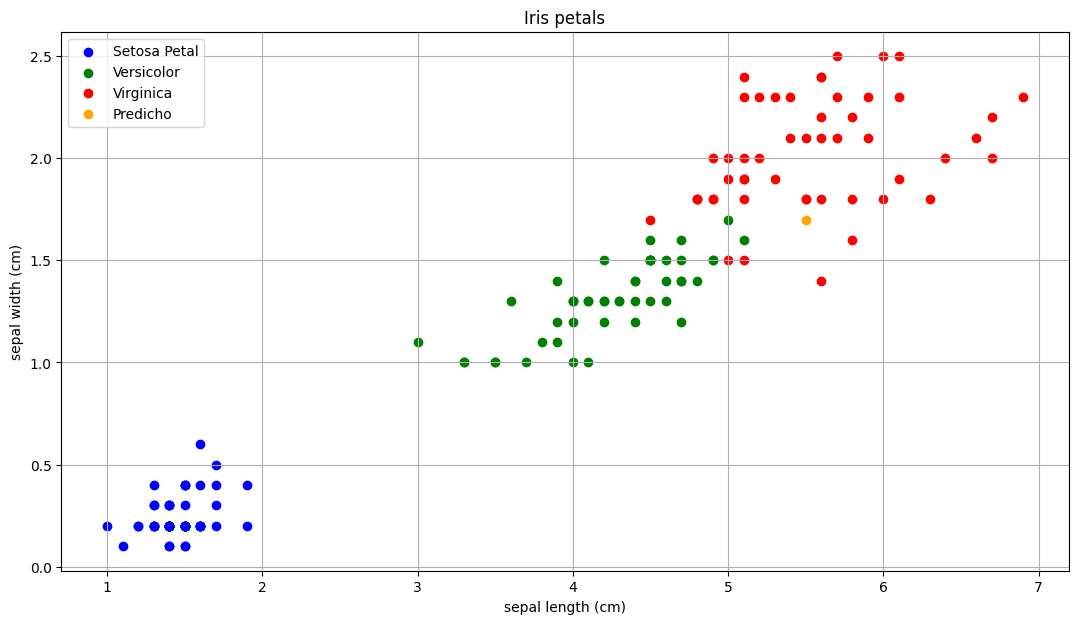

In [18]:

fig, ax = plt.subplots()
fig.set_size_inches(13, 7) 

species = classification(df)

setosa = df[df.species == 'setosa']
versicolor = df[df.species=='versicolor']
virginica = df[df.species=='virginica']
# lables and scatter points

ax.scatter(setosa['petal length (cm)'], setosa['petal width (cm)'], label="Setosa Petal", facecolor="blue")
ax.scatter(versicolor['petal length (cm)'], versicolor['petal width (cm)'], label="Versicolor", facecolor="green")
ax.scatter(virginica['petal length (cm)'], virginica['petal width (cm)'], label="Virginica", facecolor="red")
ax.scatter([5.5],[1.7], label="Predicho",facecolor="orange")

ax.set_xlabel("sepal length (cm)")
ax.set_ylabel("sepal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# linear, rbf, ply

svm_c = SVC(kernel = "poly", C = 1)
svm_c.fit(X_train,y_train)

y_pred = svm_c.predict(X_test)

accuracy_score(y_pred,y_test)

0.9777777777777777

## No separación lineal

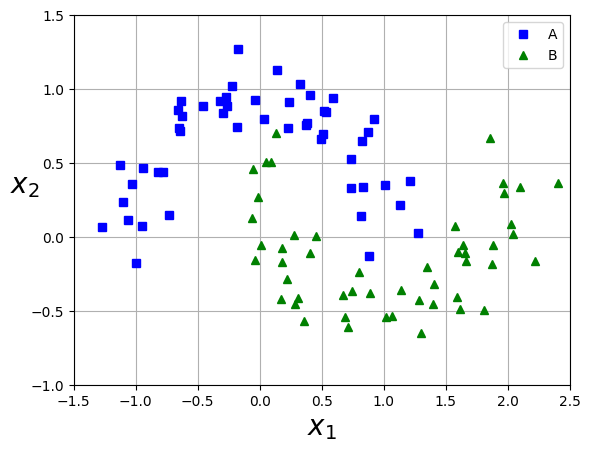

In [20]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",label = "A")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^",label = "B")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.legend(["A","B"])
plt.show()

In [21]:
y

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1])

Para el caso anterior entrenamos el SVM usando un kernel polinomial

In [22]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

'''
poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)
'''



'\npoly100_kernel_svm_clf = Pipeline([\n        ("scaler", StandardScaler()),\n        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))\n    ])\npoly100_kernel_svm_clf.fit(X, y)\n'

In [23]:
poly_kernel_svm_clf.predict([[1.5,-0.3]])


array([1])

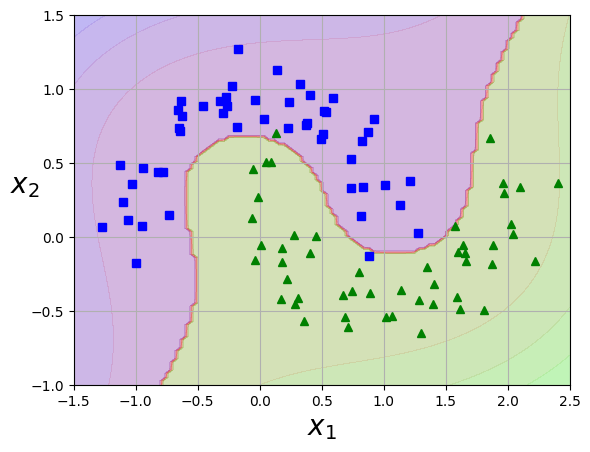

In [24]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)

    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

#save_fig("moons_polynomial_svc_plot")
plt.show()

In [25]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])

#poly_kernel_svm_clf = SVC(kernel = "poly", C = 1)

poly_kernel_svm_clf.fit(X, y)

y_pred = poly_kernel_svm_clf.predict(X_test)

accuracy_score(y_pred,y_test)

0.9666666666666667

link de interes : https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.07-Support-Vector-Machines.ipynb#scrollTo=c7sees3d1dBq


## Ejercicio


In [26]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


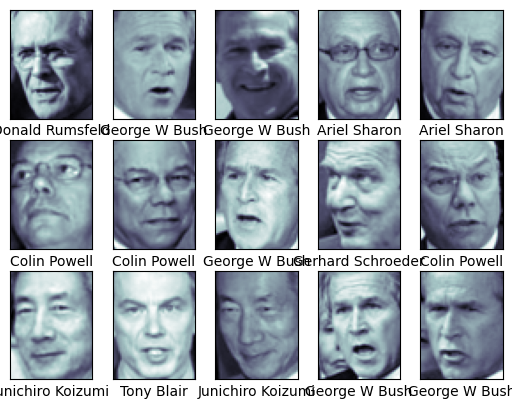

In [27]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [33]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [34]:
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

In [39]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, train_test_split

param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

CPU times: user 3min 4s, sys: 3min 53s, total: 6min 58s
Wall time: 40.1 s
{'svc__C': 10, 'svc__gamma': 0.005}


In [37]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

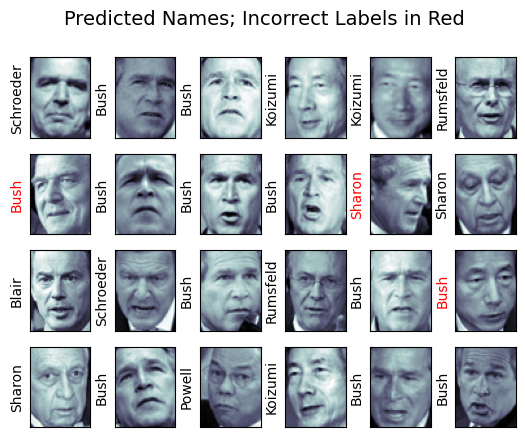

In [38]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

recall -> Exhaustividad (La métrica de exhaustividad nos va a informar sobre la cantidad que el modelo de machine learning es capaz de identificar.)

f1-score -> Valor-F (se utiliza para combinar las medidas de precision y recall en un sólo valor. )

support -> 

In [40]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.70      0.54      0.61        13
     Colin Powell       0.78      0.88      0.83        66
  Donald Rumsfeld       1.00      0.60      0.75        30
    George W Bush       0.82      0.94      0.88       139
Gerhard Schroeder       0.94      0.71      0.81        24
Junichiro Koizumi       1.00      0.82      0.90        17
       Tony Blair       0.93      0.81      0.86        31

         accuracy                           0.84       320
        macro avg       0.88      0.76      0.81       320
     weighted avg       0.86      0.84      0.84       320

